In [26]:
import mne
import matplotlib as plt
import numpy as np
import pandas as pd

In [27]:
epo = mne.read_epochs("../../data/S1.fif")

Reading ../../data/S1.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
<ipython-input-27-6edf9a6103df>:1: RuntimeWarning: This filename (../../data/S1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epo = mne.read_epochs("../../data/S1.fif")


    Using multitaper spectrum estimation with 7 DPSS windows
<ipython-input-28-589ee4319b74>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _=epo.plot_psd()


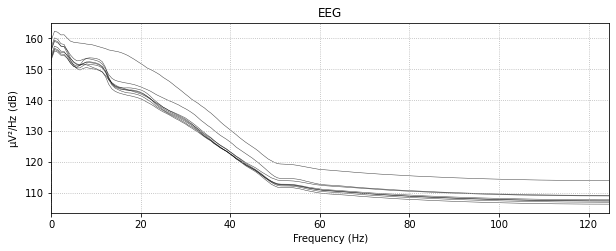

In [28]:
_=epo.plot_psd()

<ipython-input-52-3e6151290854>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  _=mne.viz.plot_compare_evokeds(dict({'Target':epo['target'].average(), 'Non-target':epo['no-target'].average()}), picks=['C3'])


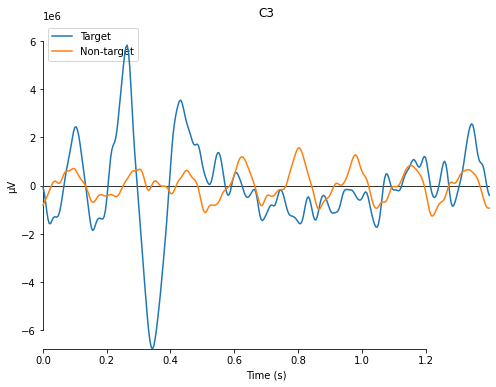

In [52]:
_=mne.viz.plot_compare_evokeds(dict({'Target':epo['target'].average(), 'Non-target':epo['no-target'].average()}), picks=['C3'])
ch_names = epo.info['ch_names']

# MNE Raw files

In [59]:
raw = mne.io.read_raw("../../data/R_S1.fif")

Opening raw data file ../../data/R_S1.fif...
Isotrak not found
    Range : 0 ... 60870 =      0.000 ...   243.480 secs
Ready.
<ipython-input-59-4fad5a42b864>:1: RuntimeWarning: This filename (../../data/R_S1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw("../../data/R_S1.fif")


In [67]:
montage = mne.channels.make_standard_montage(kind="standard_1020")
raw.set_montage(montage)

<Raw | R_S1.fif, 9 x 60871 (243.5 s), ~20 kB, data not loaded>

Effective window size : 8.192 (s)


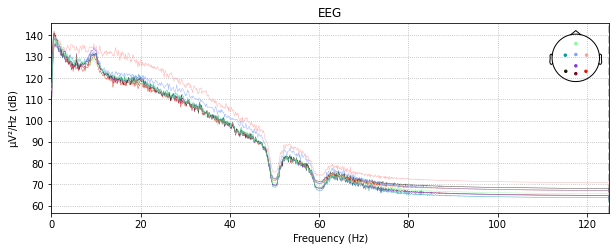

In [68]:
_=raw.plot_psd()